<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/Code_Python_Arbre_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mise en oeuvre d'un modèle d'arbre de décision
#pour voir les clients qui viennent occasionnellement ou frequemment
#importation du package de visualisation
import seaborn as sns
#importer des données IRIS qui sont fournis par la bibliothèque
df=sns.load_dataset('iris')

#affichage des premières lignes du dataset iris
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#modifier le type de la variable species en categoriel
df["species"]=df["species"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [5]:
#on va vérifier si on a des valeurs manquantes
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [6]:
#on sort les statistiques descriptives
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


<Axes: xlabel='species', ylabel='count'>

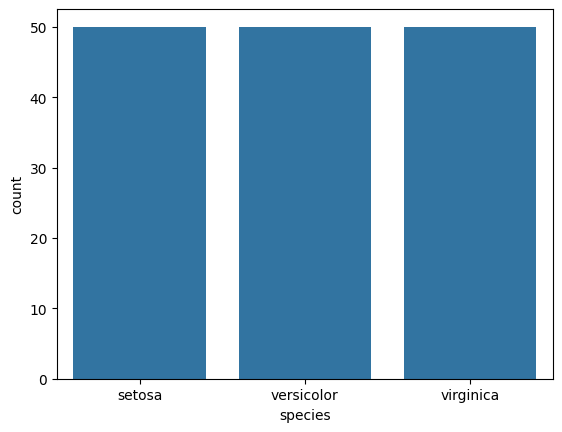

In [7]:
#etudier la répartition des observations en fonction de species
sns.countplot(x="species",data=df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

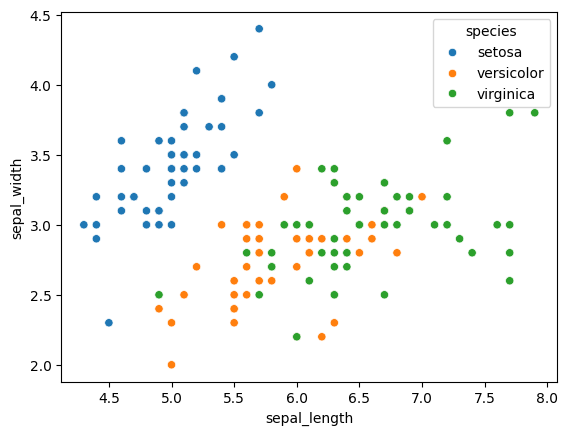

In [8]:
#on étudie les nuages de points en croisant les variables quantitatives
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

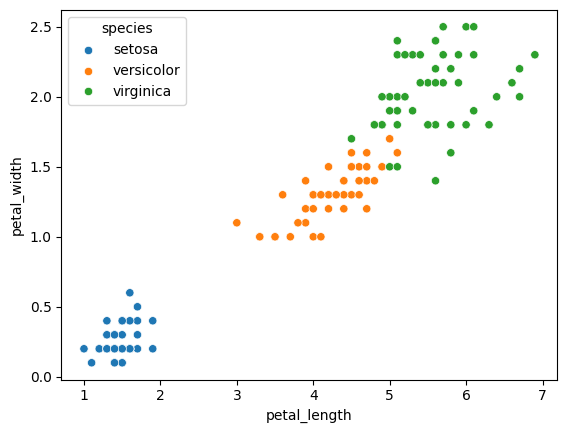

In [9]:
#on étudie les nuages de points en croisant les variables quantitatives
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=df)

<Axes: xlabel='species', ylabel='petal_length'>

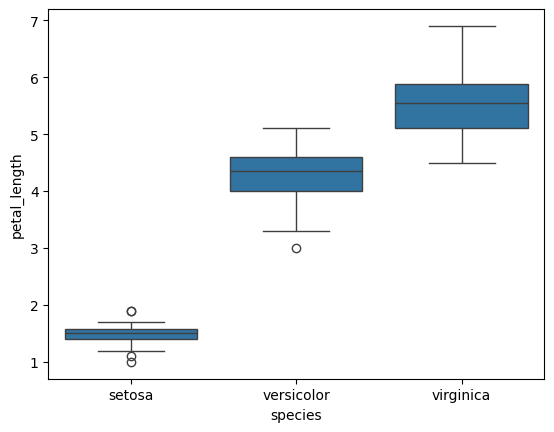

In [10]:
#on etudie la répartition des variables quantitatives par rapport à la variable catégoriel "species"
sns.boxplot(x="species",y="petal_length",data=df)

<Axes: xlabel='species', ylabel='petal_width'>

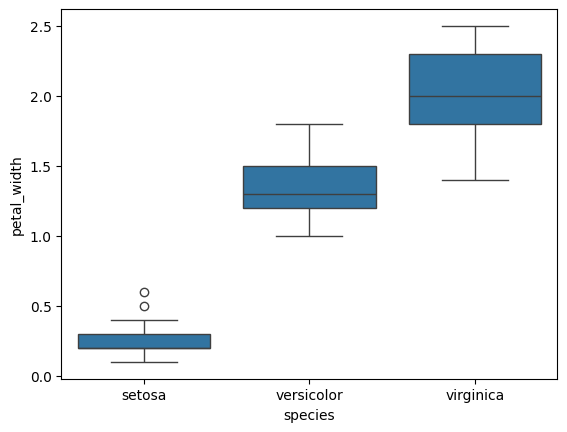

In [11]:
#faire le tour des 4 autres variables par rapport à la variable categoriel "species"
sns.boxplot(x="species",y="petal_width",data=df)

<Axes: xlabel='species', ylabel='petal_length'>

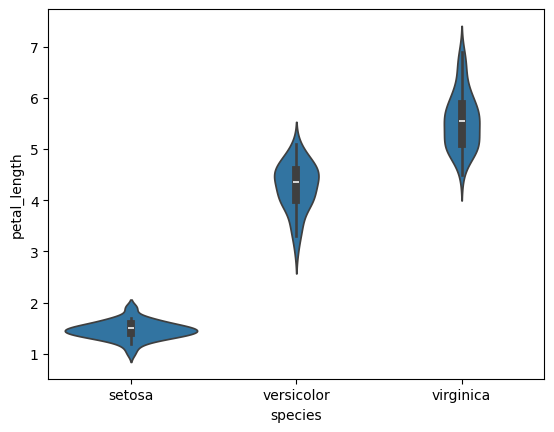

In [12]:
#faire un graphique de violin plot
sns.violinplot(x="species",y="petal_length",data=df)

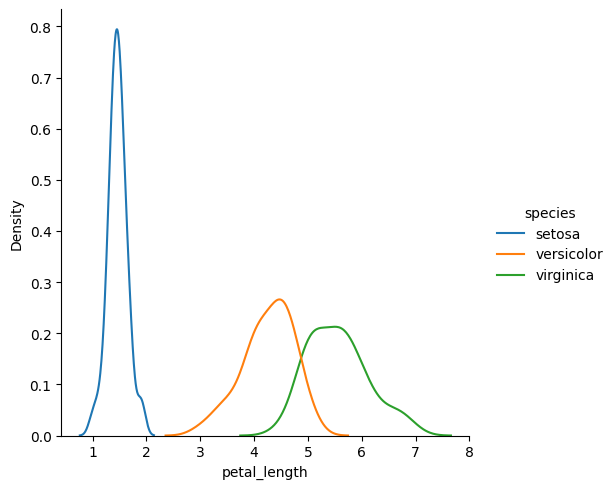

In [13]:
#faire la courbe de distribution
sns.displot(x='petal_length',kind='kde',data=df,hue='species')

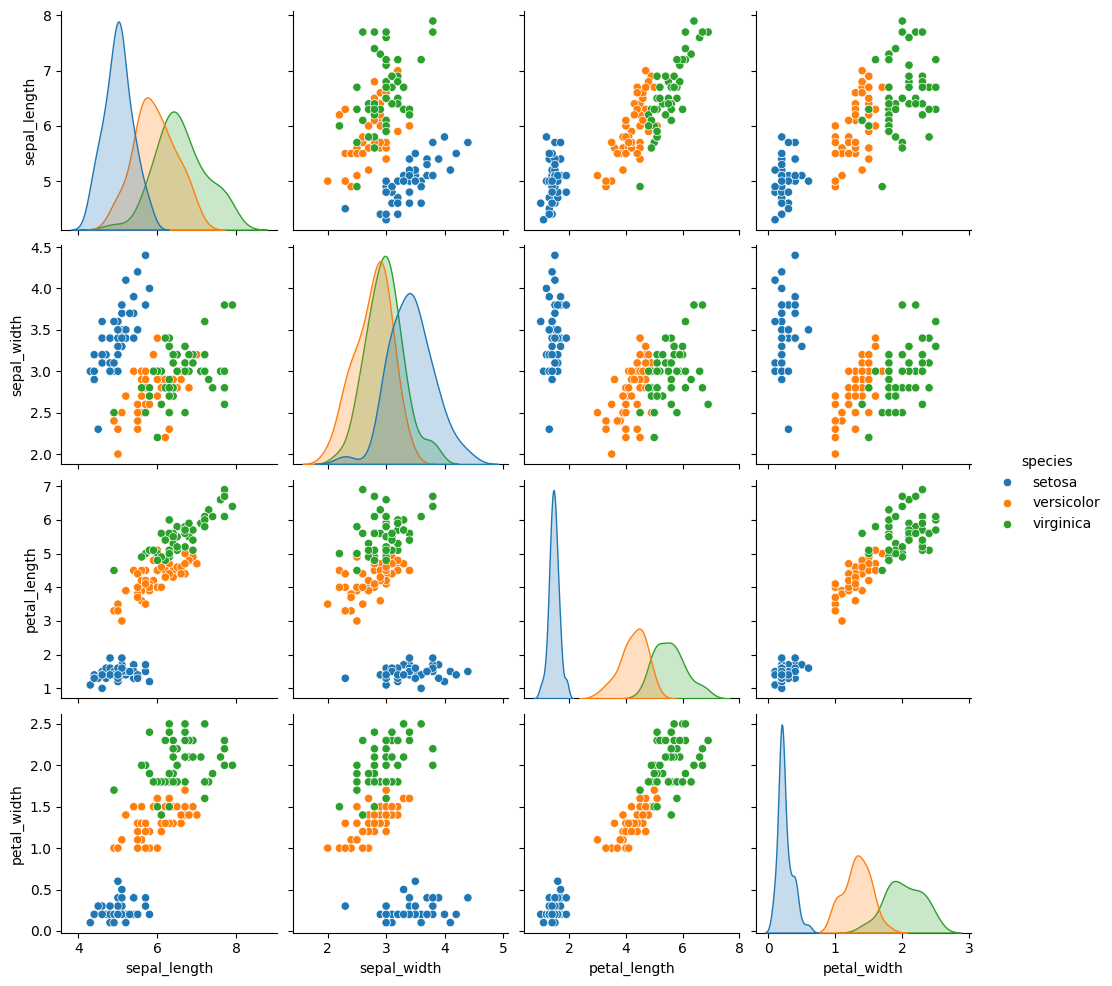

In [14]:
#on va faire l'ensemble des graphiques dans un seul graphique
sns.pairplot(df,hue="species")

In [17]:
#on passe à la modelisation pour cela
#on va séparer les variables explicatives toutes seules X
#on va mettre species dans Y qui est la variable à expliquer
X=df.drop("species",axis=1)
Y=df["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#On va créer un echantillon d'entrainement et un echantillon de test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
#On vérifie la taille des deux échantillons
print("la taille de l'échantillon d'entrainement X",X_train.shape)
print("la taille de l'échantillon de test X",X_test.shape)
print("la taille de l'échantillon d'entrainement Y",Y_train.shape)
print("la taille de l'échantillon de test Y",Y_test.shape)

la taille de l'échantillon d'entrainement X (120, 4)
la taille de l'échantillon de test X (30, 4)
la taille de l'échantillon d'entrainement Y (120,)
la taille de l'échantillon de test Y (30,)


In [20]:
#on va entrainer notre model
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

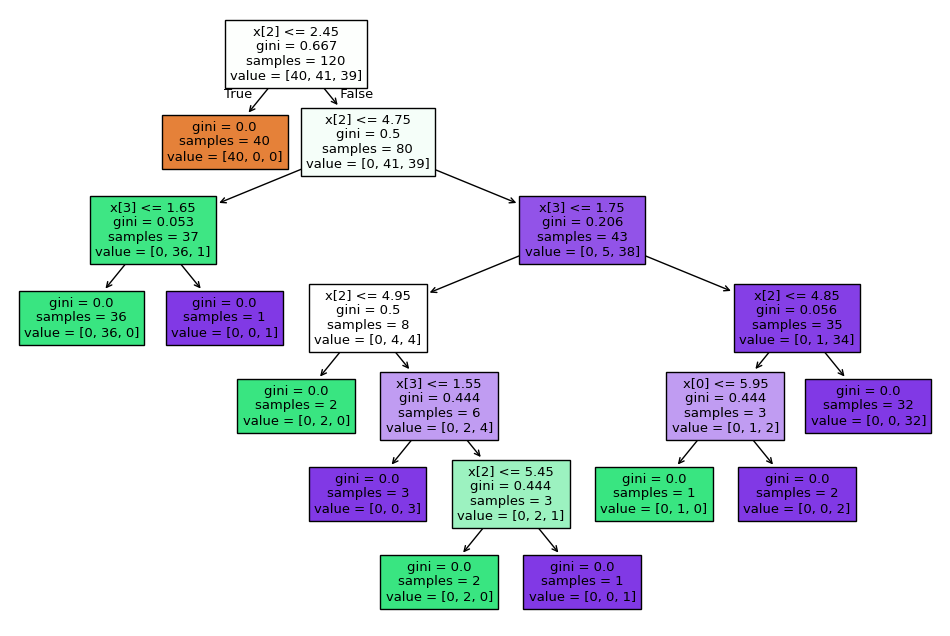

In [21]:
import matplotlib.pyplot as plt
#l'arbre le plus simple possible
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True)
plt.show()


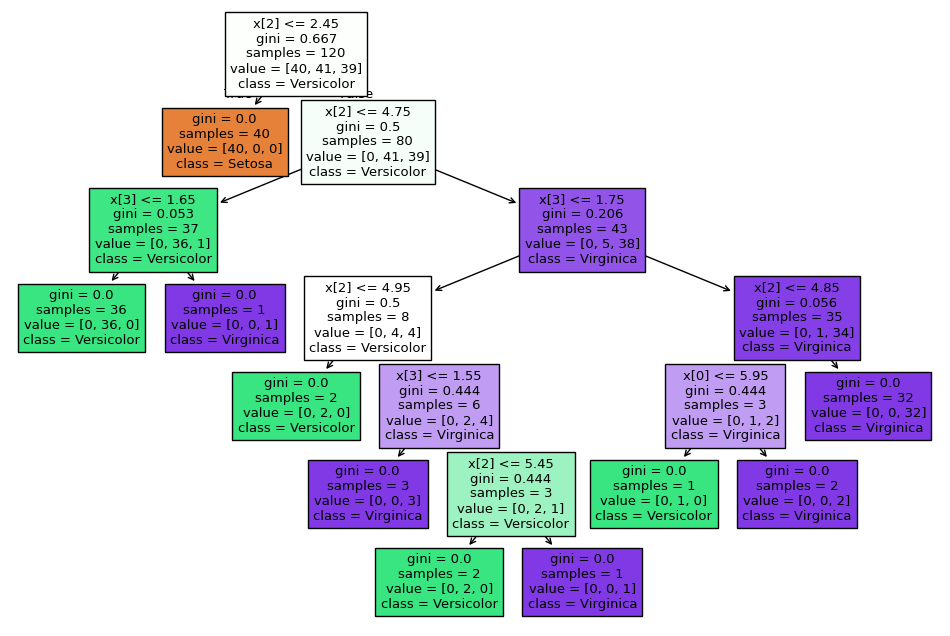

In [22]:
#on va ajouter des détails sur notre arbre
names=['Setosa','Versicolor','Virginica']
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,class_names=names)
plt.show()

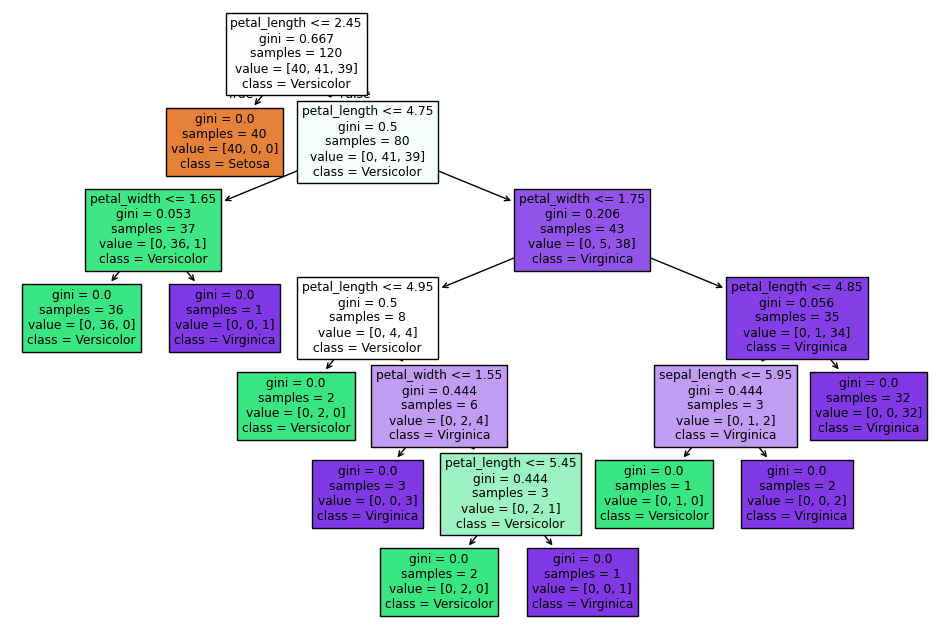

In [23]:
#on va ajouter des détails sur notre arbre en precisant les noms des variables
names=['Setosa','Versicolor','Virginica']
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,feature_names=X.columns,class_names=names)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

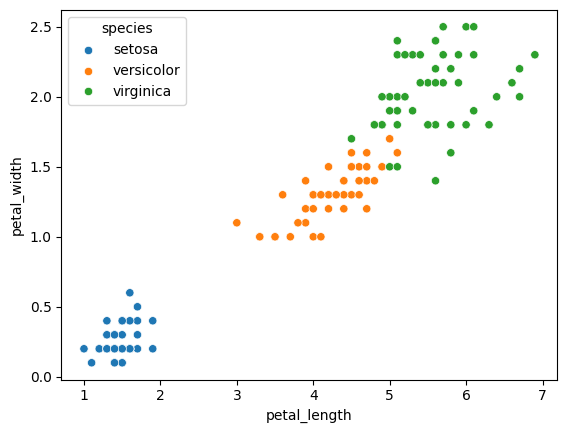

In [24]:
#On vérifie visuellement
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=df)

In [25]:
#On va créer un model final avec uniquement 3 niveaux
model_final=tree.DecisionTreeClassifier(max_depth=2)
model_final.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

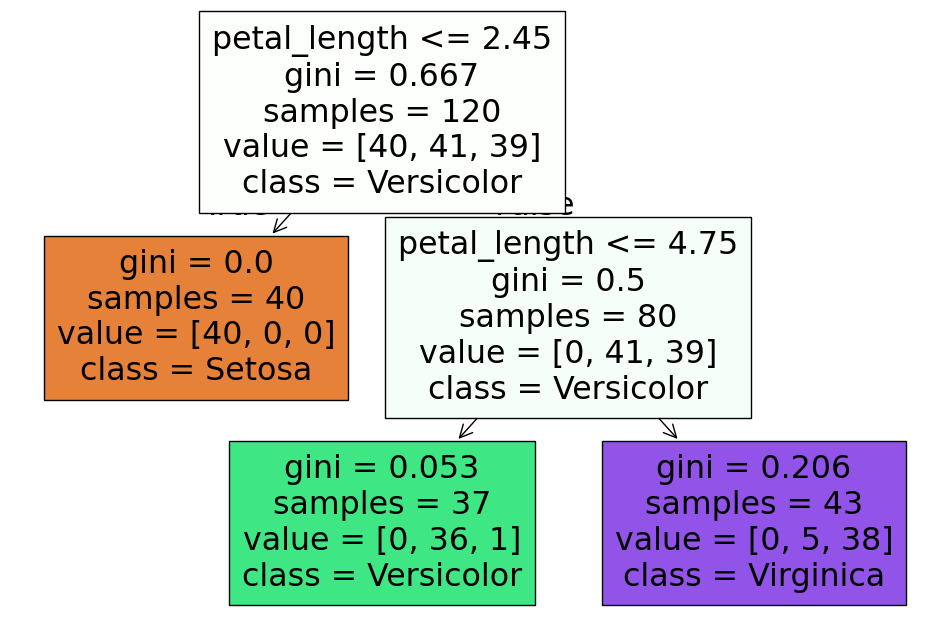

In [26]:
#On va afficher mon arbre final
names=['Setosa','Versicolor','Virginica']
plt.figure(figsize=(12,8))
tree.plot_tree(model_final,filled=True,feature_names=X.columns,class_names=names)
plt.show()

In [27]:
#les prévsions sur l'echantillon test
Y_predict=model_final.predict(X_test)
print(Y_predict)

['versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [31]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
mat_conf=confusion_matrix(Y_test,Y_predict)

In [32]:
#afficher la matrice de confusion
print(mat_conf)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [33]:
precision=mat_conf.diagonal()/mat_conf.sum(axis=1)
print(precision)

[1.         0.88888889 1.        ]
